In [20]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [21]:
# Load data
df=pd.read_csv('C:/Users/ISHITA GUPTA/Desktop//training.1600000.processed.noemoticon.csv', encoding='latin-1', names=["target", "ids", "date-time", "query", "username", "feedback"])

In [22]:
df.head(10)

,target,ids,date-time,query,username,feedback
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [23]:
df.tail(10)

,target,ids,date-time,query,username,feedback
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [24]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [25]:
df.shape

(1600000, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
target       1600000 non-null int64
ids          1600000 non-null int64
date-time    1600000 non-null object
query        1600000 non-null object
username     1600000 non-null object
feedback     1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [27]:
df.dtypes

target        int64
ids           int64
date-time    object
query        object
username     object
feedback     object
dtype: object

In [28]:
df.isnull().sum()

target       0
ids          0
date-time    0
query        0
username     0
feedback     0
dtype: int64

In [29]:
# Character Count
df['feedback'].apply(lambda x : len(x))

0          115
1          111
2           89
3           47
4          111
5           29
6           11
7           99
8           36
9           25
10          43
11          26
12          94
13          77
14         117
15         103
16          93
17          20
18          64
19          79
20          62
21         101
22          48
23          38
24          26
25          46
26          65
27          22
28          89
29          81
          ... 
1599970     81
1599971     80
1599972     41
1599973     66
1599974    133
1599975    138
1599976     59
1599977     68
1599978     25
1599979     14
1599980     63
1599981     65
1599982    135
1599983    115
1599984    106
1599985    139
1599986     37
1599987     73
1599988    125
1599989     34
1599990     21
1599991    133
1599992     33
1599993     17
1599994    132
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: feedback, Length: 1600000, dtype: int64

In [30]:
# No. of hashtags
df['feedback'].apply(lambda x : len([t for t in x.split() if t.startswith('#')]))

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1599970    0
1599971    0
1599972    0
1599973    0
1599974    0
1599975    0
1599976    0
1599977    0
1599978    0
1599979    0
1599980    0
1599981    0
1599982    0
1599983    0
1599984    0
1599985    2
1599986    0
1599987    0
1599988    1
1599989    0
1599990    0
1599991    0
1599992    0
1599993    0
1599994    0
1599995    0
1599996    0
1599997    0
1599998    0
1599999    1
Name: feedback, Length: 1600000, dtype: int64

In [31]:
# No. of Mentions
df['feedback'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))

0          1
1          0
2          1
3          0
4          1
5          1
6          0
7          1
8          1
9          1
10         0
11         0
12         1
13         1
14         1
15         2
16         0
17         0
18         1
19         1
20         1
21         0
22         1
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1599970    2
1599971    1
1599972    1
1599973    0
1599974    1
1599975    1
1599976    1
1599977    1
1599978    1
1599979    0
1599980    1
1599981    0
1599982    1
1599983    1
1599984    0
1599985    0
1599986    1
1599987    1
1599988    1
1599989    1
1599990    0
1599991    2
1599992    0
1599993    1
1599994    1
1599995    0
1599996    0
1599997    0
1599998    0
1599999    3
Name: feedback, Length: 1600000, dtype: int64

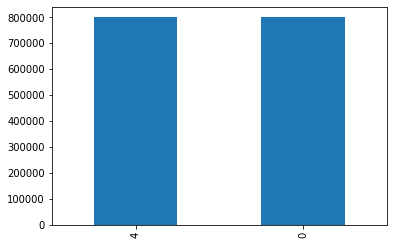

In [32]:
# visualizing number of tweets in each category(positive and negative)
df.target.value_counts().plot(kind='bar')

In [33]:
df['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [34]:
## Conclusion: Only negative and positive polarity tweets are available in our dataset

In [35]:
!pip install wordcloud


You should consider upgrading via the 'c:\users\ishita gupta\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
from wordcloud import WordCloud, STOPWORDS

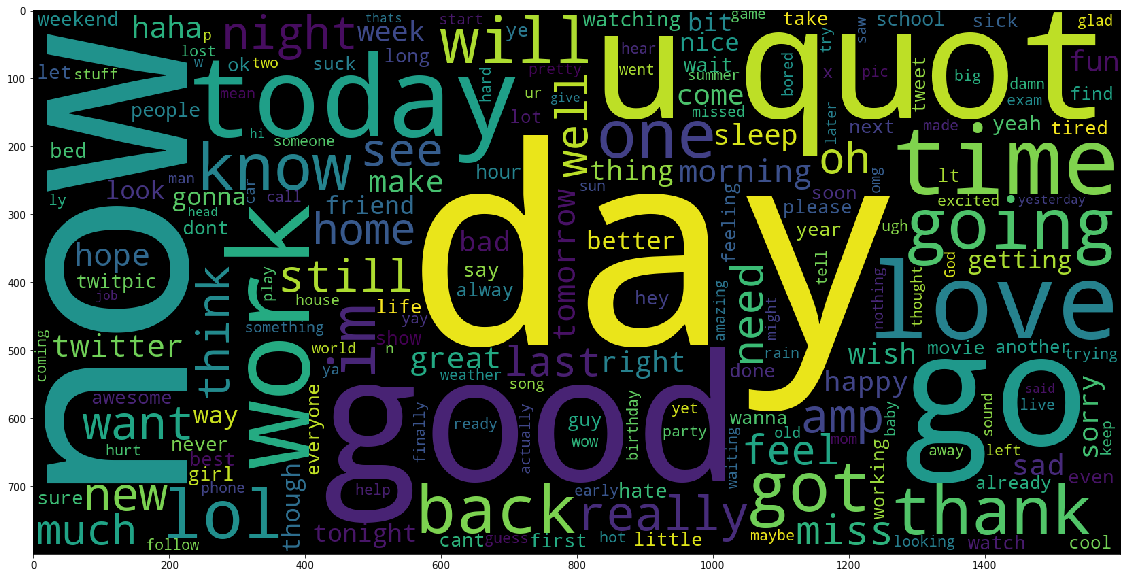

In [37]:
wordcloud=WordCloud(width=1600, height=800, random_state=0, collocations=False).generate(' '.join(df['feedback'].tolist()))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)

In [38]:
# Label Encoding
y=df['target']
le=LabelEncoder()
y=le.fit_transform(y)

In [39]:
# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['feedback'], y, test_size = 0.20, random_state = 0)

In [40]:
# BoW(Bag of Words) model
cv = CountVectorizer(max_features = 600)
X_train_dtm = cv.fit_transform(X_train).toarray()
X_test_dtm = cv.transform(X_test).toarray()

In [41]:
# Logistic Regression on our training dataset
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_dtm, y_train) 

C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = classifier.predict(X_test_dtm)

In [43]:
accuracy_score(y_test, y_pred)

0.7499875

In [44]:
cm = confusion_matrix(y_test, y_pred)

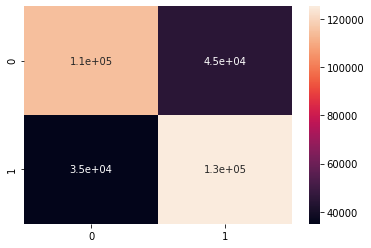

In [45]:
sns.heatmap(cm, annot=True)

In [46]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
Y_pred = nb.predict(X_train_dtm)

In [ ]:
accuracy_score(X_train_dtm,Y_pred)

In [48]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.feedback)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 690961


In [49]:
X = pad_sequences(tokenizer.texts_to_sequences(df.feedback),maxlen = 30)
print("X Shape:",X.shape)

X Shape: (1600000, 30)
